In [83]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

from mpl_toolkits.axes_grid1 import make_axes_locatable

We generate a surface from the set of data point. The Surface is given by the equation:
$$
    f(x,y) = e^x\sin(y) + e^y\sin(x) + \cos(x+y)
$$

Then some noise is added to the data points and it was fitted to the surface. where the fitting function is
$$
    g(x,y) = A\times e^x\sin(y) + B\times e^y\sin(x) + C\times\cos(x+y)
$$

In [105]:
# Data generation
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 2*np.pi, 100)

# generate a meshgrid
X, Y = np.meshgrid(x, y)

# trignometric function
Z = np.exp(X) * np.sin(Y) + np.exp(Y) * np.sin(X) + np.cos(X+Y)

# add noise to the function
Z_noise = Z + 10*np.random.normal(size=(len(y), len(x)))

# defing the function to be fitted
def func(X, a, b, c):
    x = X[0]
    y = X[1]
    return a*np.exp(x) * np.sin(y) + b*np.exp(y) * np.sin(x) + c*np.cos(x+y)

# flatten the arrays
x_vals = X.flatten()
y_vals = Y.flatten()
z_vals = Z_noise.flatten()
XY = np.array([x_vals, y_vals])

# fitting the function
popt, pcov = curve_fit(func, XY, z_vals)

# generating the best fit surface
z_opt_flatten = func(XY, *popt)
z_opt = z_opt_flatten.reshape(len(y), len(x))

Text(0.5, 0.92, '3D surface plot of the function with input datapoints')

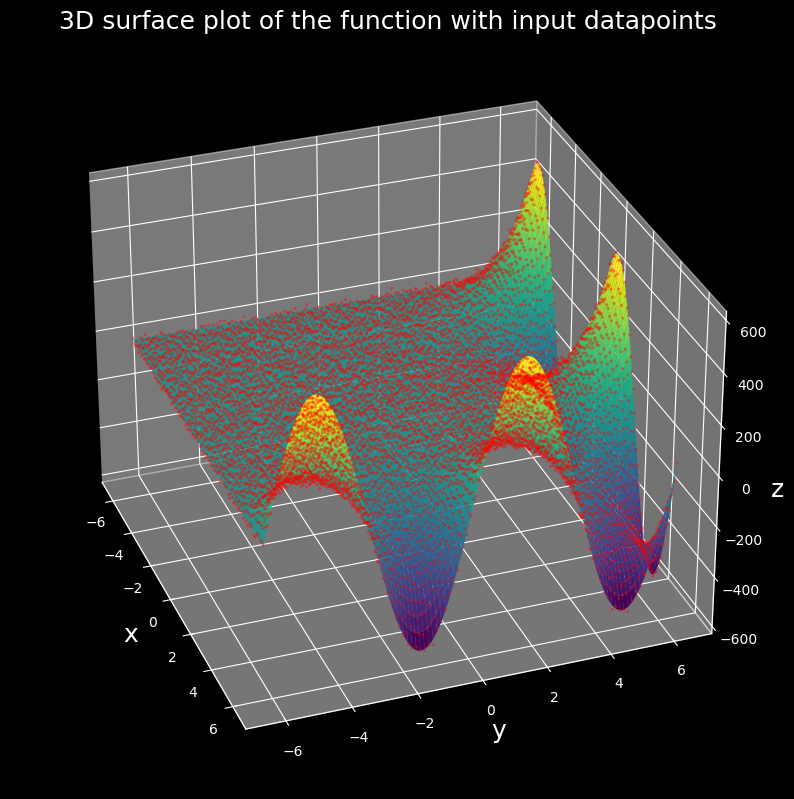

In [106]:
#making 3D surface plot of the function
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X, Y, Z_noise, c='red',marker='.', alpha=0.4, edgecolor='none', label='Data points')
ax.plot_surface(X, Y, z_opt, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

# setting the labels
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)

# changing angle of view
ax.view_init(elev=30, azim=-20)
ax.set_title('3D surface plot of the function with input datapoints',pad=-20, fontsize=18)

# plt.savefig('3D_surface_plot.jpg', dpi=200)

In [107]:
# pprinting the optimized parameters
print('Optimized parameters:')
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])


Optimized parameters:
a = 0.9992599657273723
b = 1.0005971885083516
c = 1.0040030208579842


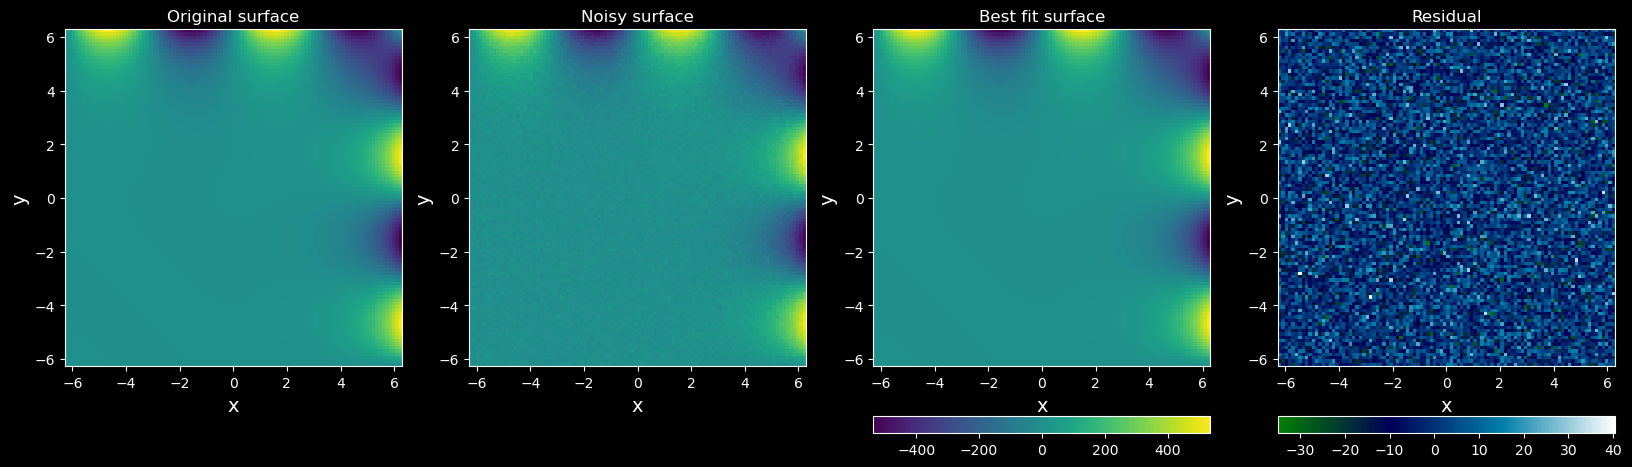

In [109]:
# showing image of data and best fit surface
fig, ax = plt.subplots(1, 4, figsize=(20, 6), dpi=100)
ax[0].imshow(Z, cmap='viridis', origin='lower', extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
ax[1].imshow(Z_noise, cmap='viridis', origin='lower', extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
ax[2].imshow(z_opt, cmap='viridis', origin='lower', extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
ax[3].imshow((Z_noise - z_opt), cmap='ocean', origin='lower',  extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])

# adding colorbar for each image
for i in range(4):
    ax[i].set_xlabel('x', fontsize=14)
    ax[i].set_ylabel('y', fontsize=14)
    
# fig.colorbar(ax[2].images[0], ax=ax[2])
# fig.colorbar(ax[3].images[0], ax=ax[3])

d1 = make_axes_locatable(ax[2])
d2 = make_axes_locatable(ax[3])
d3 = make_axes_locatable(ax[0])
d4 = make_axes_locatable(ax[1])

cax1 = d1.new_vertical(size="5%", pad=0.5, pack_start=True)
cax2 = d2.new_vertical(size="5%", pad=0.5, pack_start=True)
n1 = d3.new_vertical(size="5%", pad=0.5, pack_start=True)   # null axis for better appearance   
n2 = d4.new_vertical(size="5%", pad=0.5, pack_start=True)   # null axis for better appearance

# adding colorbar to cax1 and cax2
fig.add_axes(cax1)
fig.add_axes(cax2)
fig.colorbar(ax[2].images[0], cax=cax1, orientation='horizontal')
fig.colorbar(ax[3].images[0], cax=cax2, orientation='horizontal')

# adding title to each image
ax[0].set_title('Original surface')
ax[1].set_title('Noisy surface')
ax[2].set_title('Best fit surface')
ax[3].set_title('Residual')

#saving the plot
plt.savefig('contour_plot.jpg', dpi=200, bbox_inches='tight')